# Customer Behaviour Prediction in Retail Industry - Starbucks 


### Contents 

<ul>
<li><a href="#Introduction">1. Introduction</a></li>

<li><a href="#Preparation">2. Data Preparation/ Cleaning</a></li>
&emsp;2.1. Portfolio Dataframe  <br>
&emsp;2.2. Profile Dataframe <br> 
&emsp;2.3. Transcript Dataframe<br> 

<li><a href="#Exploration">3. Data Exploration</a></li>
&emsp;3.1. Current Business Situations <br>
&emsp;3.2. Customer Demographics <br>  
&emsp;3.3. Characteristics of Starbucks Offers <br>
&emsp;3.4. Customer Purchasing Patterns <br>  
 
<li><a href="#Analysis">4. Data Analysis</a></li>
&emsp;4.1. Feature Engineering  <br>  
    
 
&emsp;4.2. Data Spliting <br>
&emsp;4.3. Data Balancing <br>
&emsp;4.4. Model Comparison <br>
&emsp;4.5. Model Evaluation & Selection<br>

<li><a href="#Conclusion">5. Conclusion</a></li>
</ul>

<a id='Introduction'></a>
## 1. Introduction 

> This project is derived from the field of Customer Relationship Management (CRM) in Starbucks. One of the main concerns for CRM field is to interact with not only current customers, but also previous and potential customers, so that a company can boost its business relationship with the customers, and eventually expect its continuous sales growth. As mentioned in the provided business case, one of its marketing campaigns is to send out an offer to customers through various channels. An offer can be either just an advertisement for a certain beverage, or a coupon-type offer such as a ‘discount’ or ‘buy 1, get 1 (BOGO)’. Each offer is valid for certain number of days. The validity periods are different from offers.  <br> <br>
To maximize a return-on-investment(ROI), we should properly figure out which customers are effectively using their received offers. If a customer feels reluctant to receive advertisement offers, this might be able to result in losing users or lead to decrease customer retention rate in the long run. These types of customers should be removed in advance from the “offering-list”. In this analysis, I classify the customers into 2 groups who use appropriately our offers and who do not based on customers' individual demographic features and their purchasing patterns. 


<a id='Preparation'></a>
## 2. Data Preparation/ Cleaning 

In [1]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import math
import json
plt.rc("font", size=14)
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

### 2. 1. Portfolio Dataframe

In [3]:
portfolio.head(10) # Glance at the first dataset(1)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [4]:
portfolio.info() # Glance at the first dataset(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


Assessment of **Portfolio Dataframe**
- Dataframe "portfolio" contains all offers information. 
- It has no missing values nor duplicates. 
- The datatype of each column is correct. 
- To avoid a confusion, I will change the 'id' column name into 'offer_id'.

Cleaning **Portfolio Dataframe**

In [5]:
portfolio= portfolio.rename(columns={'id': 'offer_id'})
portfolio.head()

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


### 2. 2. Profile Dataframe

In [6]:
print(profile.shape)
profile.head() # Glance at the second dataset(1)

(17000, 5)


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [7]:
profile.info() # Glance at the second dataset(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [8]:
sum(profile.duplicated()) # No Duplicates in the Profile Dataset

0

In [9]:
# Turn off scientific notation in pandas 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
profile.query('age != 118').describe() # Descriptive statistics of the dataset with non-missing values.

,age,became_member_on,income
count,14825.00,14825.00,14825.00
mean,54.39,20166887.15,65404.99
std,17.38,11885.65,21598.30
min,18.00,20130729.00,30000.00
25%,42.00,20160520.00,49000.00
50%,55.00,20170802.00,64000.00
75%,66.00,20171230.00,80000.00
max,101.00,20180726.00,120000.00


Assessment of **Profile Dataframe**
- Profile Dataframe contains customer information. 
- There are 2,175 missing datapoints. These missing values are represented as 'None', 'NaN in 'gender', 'income' column, respectively. 
- All the missing datapoints has 118 age value equally. 
- These missing values are replaced with each median value.
- The missing values in 'gender' column will be replaced with 'O', meaning 'Others'. [Reference - Gender Classification](https://de.wikipedia.org/wiki/Datenstandards_zur_Beschreibung_des_Geschlechts)
- The datatype of the column "became_member_on" should be changed to datetime.

Cleaning **Profile Dataframe**

In [10]:
profile_wo_mv = profile.query('age != 118') # Profile Dataframe without missing values 
median_age = profile_wo_mv.age.median() # The median value of ages 
median_income = profile_wo_mv.income.median() # The median value of incomes

# Replace the missing values in gender column with U (Unknown), in income column with its median value. 
profile.fillna({'gender' : 'O', 'income':median_income }, inplace= True) 
# Replace the missing values (118) in age column with its median value. 
profile_cleaned = profile.replace({'age':118}, median_age)

Text(0.5, 0, 'Gender')

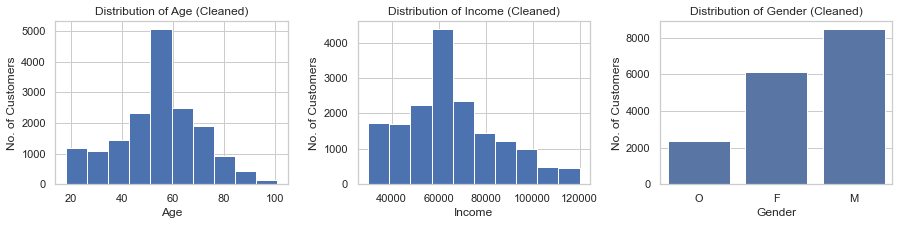

In [11]:
# Visualisation of each feature after cleaning the dataset. 
plt.figure(figsize=[15,3]) 
plt.subplots_adjust(wspace = 0.3 , hspace= 0.5)
base_color =sns.color_palette()[0]

plt.subplot(1, 3, 1)
profile_cleaned.age.hist()
plt.title('Distribution of Age (Cleaned)')
plt.ylabel('No. of Customers')
plt.xlabel('Age')

plt.subplot(1, 3, 2)
profile_cleaned.income.hist()
plt.title('Distribution of Income (Cleaned)')
plt.ylabel('No. of Customers')
plt.xlabel('Income')

plt.subplot(1, 3, 3)
sns.countplot(data = profile_cleaned, x='gender', color = base_color)
plt.title('Distribution of Gender (Cleaned)')
plt.ylabel('No. of Customers')
plt.xlabel('Gender')

In [12]:
# Datatype of the column : 'became_member_on' is changed to 'datetime'
profile_cleaned['became_member_on'] = pd.to_datetime(profile_cleaned['became_member_on'], format = '%Y%m%d')

In [13]:
# The latest date of 'became_member_on'
profile_cleaned['became_member_on'].max()

Timestamp('2018-07-26 00:00:00')

In [14]:
# Calcuate the number of days as a member  
def calculate_days(dates):
    last_record = pd.Timestamp('2018-07-31')
    return last_record - dates

In [15]:
# Calculate the number of days as member for each customer. 
profile_cleaned['days_as_member'] =  profile_cleaned['became_member_on'].apply(calculate_days).dt.days

# To avoid confusion, I rename 'id' column with 'customer_id'. 
profile_cleaned= profile_cleaned.rename(columns={'id': 'customer_id'})

In [16]:
profile_cleaned.head()

,gender,age,customer_id,became_member_on,income,days_as_member
0,O,55,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,64000.00,534
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.00,381
2,O,55,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,64000.00,19
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.00,448
4,O,55,a03223e636434f42ac4c3df47e8bac43,2017-08-04,64000.00,361


### 2. 3. Transcript Dataframe 

In [17]:
transcript # Glance at the third dataset(1)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [18]:
# Total Days of testing
transcript.time.nunique()

120

In [19]:
transcript.info() # Glance at the third dataset(2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


Assessment of **Transcript Dataframe**
- Semi-structured JSON data should be normalized into a flat table.
- Note that the keys in 'value' column: 'offer_id' and 'offer id' are identical. They should be unified. 
- The column 'person' is equivalent to 'customer_id' column in Profile dataset. To avoid any confusion, I will match the name of the columns.
- The numerical values are an arithmetical sequence, starting from 0 to 714 with the interval of 6. This implies that the testing lasted for 6 hours per days for 120 days (about 4 months). Therefore, I generate the new columns: days, months. 
<br><br>
- It is more informative if "offer_id" is presented with the name of corresponding offers. The name of offers can be obtain from the Portfolio dataframe.
- It is a untidy dataset. It contais more than one information. [Reference- Tidy Data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)
- The dataset should be split into 2 different datasets: <br>
&emsp; 1. offer_based_transaction with columns (person, time, amount) <br>
&emsp; 2. sales_based_transaction with columns (person, time, event, offer_id) <br>


Cleaning **Transcript Dataframe**

In [20]:
# To normalize a JSON column into a flat table.
transcript_normalized = pd.json_normalize(transcript.value)
# To unify the keys in 'value' column: 'offer_id' &  'offer id' 
transcript_normalized['offer_id'] = transcript_normalized['offer id'].fillna('') + transcript_normalized['offer_id'].fillna('')
transcript_mod = pd.concat([transcript, transcript_normalized], axis = 1)

# To drop unnecessary features 
transcript_mod.drop(['value', 'offer id'], axis =1, inplace = True) 

In [21]:
# To rename 'person' column with 'customer_id' 
transcript_mod= transcript_mod.rename(columns={'person': 'customer_id'})

# Calcuate the number of days/ months after starting the test
## Nth day since testing
transcript_mod['days'] = transcript_mod['time']/6 +1 
transcript_mod['days'] = transcript_mod['days'].astype(int)
## Nth month since testing
transcript_mod['months'] = (transcript_mod['days']-1)//30 +1
transcript_mod['months'] = transcript_mod['months'].astype(int)

In [22]:
# "offer_id" is presented with the name of corresponding offers
transcript_offer_name = transcript_mod.merge(portfolio[['offer_type', 'offer_id']], 
                                                      left_on = 'offer_id', right_on = 'offer_id', how ='left' )

In [23]:
transcript_offer_name

,customer_id,event,time,amount,offer_id,reward,days,months,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,nan,9b98b8c7a33c4b65b9aebfe6a799e6d9,nan,1,1,bogo
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,nan,0b1e1539f2cc45b7b9fa7c272da2e1d7,nan,1,1,discount
2,e2127556f4f64592b11af22de27a7932,offer received,0,nan,2906b810c7d4411798c6938adc9daaa5,nan,1,1,discount
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,nan,fafdcd668e3743c1bb461111dcafc2a4,nan,1,1,discount
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,nan,4d5c57ea9a6940dd891ad53e9dbe8da0,nan,1,1,bogo
...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,,nan,120,4,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,,nan,120,4,NaN
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61,,nan,120,4,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53,,nan,120,4,NaN


In [24]:
# Tidiness of the Dataset - seperate into two datasets: offer_based, and sales_based 

# Offer_based_transaction: event != "transaction"
# From offer_based_transaction, we can figure out which offers are provided which customers. 
offer_based_transaction = transcript_offer_name.query('event != "transaction"')
offer_based_transaction.drop(['amount'], axis = 1, inplace=True)

# sales_based_transaction: event == "transaction"
# From sales_based_transaction, we can figure out how much customers spent at our stores. 
sales_based_transaction = transcript_offer_name.query('event == "transaction"')
sales_based_transaction.drop(['offer_id'], axis = 1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
# Make Checkpoints
offer_info_df = portfolio.copy()
customer_info_df = profile_cleaned.copy()
transactions_df = transcript_offer_name.copy()
sales_transaction_df = sales_based_transaction.copy()
offers_transaction_df = offer_based_transaction.copy()

--------------------------------

<a id='Exploration'></a>
## 3. Data Exploration  
- 3.1. Current Business Situations
- 3.2. Customer Demographics
- 3.3. Characteristics of Starbucks Offers
- 3.4. Customer Purchasing Patterns <br>


### 3. 1. Current Business Situations

#### The Change of traffics during the test period

Text(0.5, 0.98, 'Daily and Monthly Traffics')

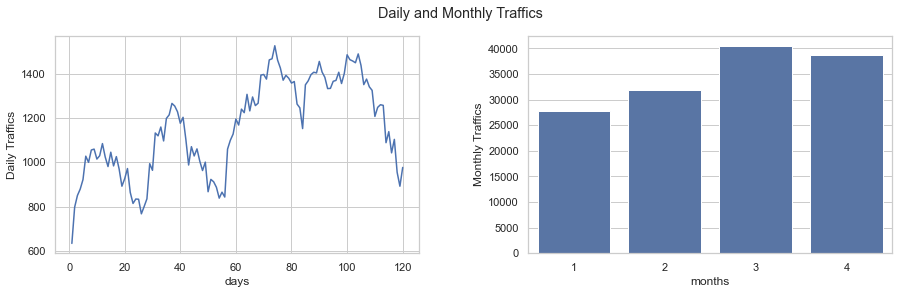

In [26]:
plt.figure(figsize=[15,4]) 
plt.subplots_adjust(wspace = 0.3 , hspace= 0.5)
base_color =sns.color_palette()[0]

plt.subplot(1, 2, 1)
sales_transaction_df.groupby('days')['customer_id'].count().plot(kind ='line')
plt.ylabel('Daily Traffics')

plt.subplot(1, 2, 2)
sns.countplot(data = sales_transaction_df, x = 'months', color = base_color)
plt.ylabel('Monthly Traffics')

plt.suptitle('Daily and Monthly Traffics')

#### The Sales Trend  Amount during the test period

Text(0.5, 0.98, 'Daily and Monthly Sales Amount')

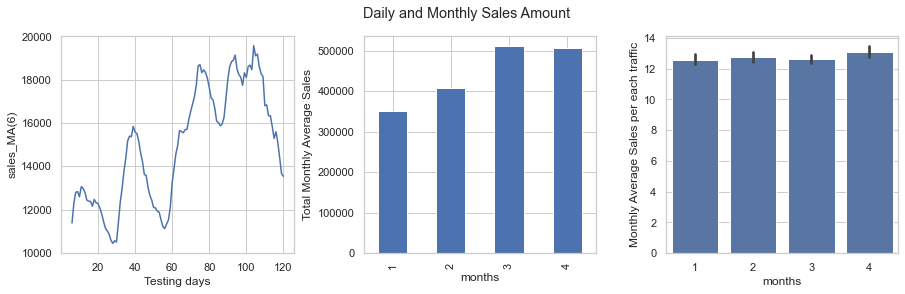

In [27]:
plt.figure(figsize=[15,4]) 
plt.subplots_adjust(wspace = 0.3 , hspace= 0.5)

plt.subplot(1, 3, 1)
sales = sales_transaction_df.groupby('days',  as_index= False)['amount'].sum()
sales['sales_MA(6)'] = sales.iloc[:,1].rolling(window =6).mean()
plt.plot(sales['days'], sales['sales_MA(6)'])
plt.xlabel('Testing days')
plt.ylabel('sales_MA(6)')

plt.subplot(1, 3, 2)
sales_transaction_df.groupby('months')['amount'].sum().plot(kind ='bar')
plt.ylabel('Total Monthly Average Sales')

plt.subplot(1, 3, 3)
sns.barplot(data = sales_transaction_df, x = 'months', y= 'amount',color = base_color)
plt.ylabel('Monthly Average Sales per each traffic')


plt.suptitle('Daily and Monthly Sales Amount')

In [28]:
month_1 = sales_transaction_df.query('months == 1').amount
month_2 = sales_transaction_df.query('months == 2').amount
month_3 = sales_transaction_df.query('months == 3').amount
month_4 = sales_transaction_df.query('months == 4').amount

import scipy 
scipy.stats.f_oneway(month_1, month_2, month_3)

F_onewayResult(statistic=0.2517026240434585, pvalue=0.7774763978214865)

>**Comments:** 
>- The number of traffics varies in each month. It increased until the third month. 
>- In the fourth month, however, the total number of traffics slightly decreased. Note that the 4th month traffics are still as large as that in the third month. 
>- The change of sales amounts follows almost identical patterns with the change of traffics. We can understand that more traffics bring better sales performances. 
>- Interestingly, although the number of traffics and sales amount are different in each month, the average spendings per each transaction are very similar across the months. 

###  3. 2. Customer Demographics

> In this section, I will explore whether there is a significant difference of issued offers on various demographic factors.  

In [29]:
# Making a new dataframe by Modifying the dataframe: offers_transaction_df
# The new dataframe will indicates the number of offers that each customer received 
all_offers_infos = pd.concat([offers_transaction_df, pd.get_dummies(offers_transaction_df.offer_type)], axis = 1)
all_issued_offers =all_offers_infos.query('event == "offer received"')

# all_issued_offers per customers
issued_offers_per_customer_df  =all_issued_offers.groupby('customer_id', as_index= False)[['bogo','discount', 'informational']].sum()

# Dataframe (all_issued_offers per customers) is merged with customer profile
customers_offers_merged_profile = issued_offers_per_customer_df.merge(customer_info_df, 
                                                                      left_on = 'customer_id', right_on= 'customer_id', how='left')

In [30]:
print(customers_offers_merged_profile.shape)
customers_offers_merged_profile.head()

(16994, 9)


,customer_id,bogo,discount,informational,gender,age,became_member_on,income,days_as_member
0,0009655768c64bdeb2e877511632db8f,1,2,2,M,33,2017-04-21,72000.00,466
1,00116118485d4dfda04fdbaba9a87b5c,2,0,0,O,55,2018-04-25,64000.00,97
2,0011e0d4e6b944f998e987f904e8c1e5,1,2,2,O,40,2018-01-09,57000.00,203
3,0020c2b971eb4e9188eac86d93036a77,2,2,1,F,59,2016-03-04,90000.00,879
4,0020ccbbb6d84e358d3414a3ff76cffd,2,1,1,F,24,2016-11-11,60000.00,627


In [31]:
customers_offers_merged_profile.describe()

,bogo,discount,informational,age,income,days_as_member
count,16994.00,16994.00,16994.00,16994.00,16994.00,16994.00
mean,1.79,1.80,0.90,54.47,65226.90,522.44
std,1.12,1.13,0.87,16.23,20174.70,411.27
min,0.00,0.00,0.00,18.00,30000.00,5.00
25%,1.00,1.00,0.00,45.00,51000.00,213.00
50%,2.00,2.00,1.00,55.00,64000.00,363.00
75%,3.00,3.00,1.00,65.00,76000.00,796.00
max,6.00,6.00,5.00,101.00,120000.00,1828.00


####  Gender (categorical variable)

Text(0.5, 1.0, 'Informational')

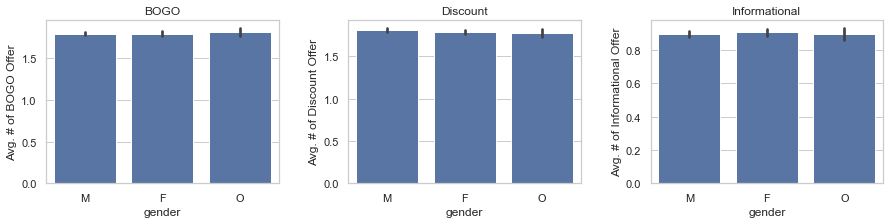

In [32]:
plt.figure(figsize=[15,3]) 
plt.subplots_adjust(wspace = 0.3 , hspace= 0.5)
gender_order = customers_offers_merged_profile.gender.value_counts()

plt.subplot(1, 3, 1)
sns.barplot(data = customers_offers_merged_profile, x = 'gender', y= 'bogo', color = base_color, order = gender_order.index)
plt.ylabel('Avg. # of BOGO Offer') 
plt.title('BOGO')

plt.subplot(1, 3, 2)
sns.barplot(data = customers_offers_merged_profile, x = 'gender', y= 'discount', color = base_color, order = gender_order.index)
plt.ylabel('Avg. # of Discount Offer') 
plt.title('Discount')

plt.subplot(1, 3, 3)
sns.barplot(data = customers_offers_merged_profile, x = 'gender', y= 'informational', color = base_color, order = gender_order.index)
plt.ylabel('Avg. # of Informational Offer') 
plt.title('Informational')

#### Income, Age, Days_as_member (numeric variables)

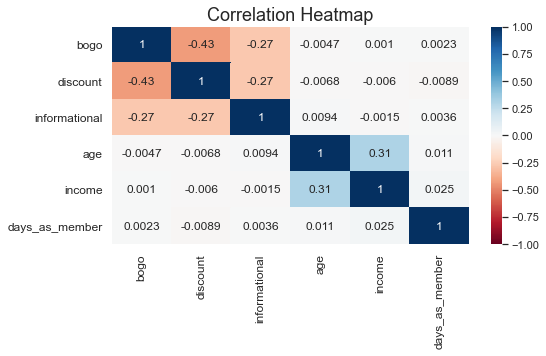

In [33]:
# Correlation in Heatmap form 
plt.figure(figsize=(8,4))
s = sns.heatmap(customers_offers_merged_profile.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax=1)

s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize =12) 
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize =12) 
plt.title('Correlation Heatmap', fontsize =18)
plt.show()

> **Comments:**
> - All customers in the profle dataset purchased products at Starbucks, although not all of them received offers. 
> - The average age of customers are 54.5 years old, and their average yearly income is around 65227. 
> - There is no significant difference between genders regarding the received type of offers. 
> - Finally the total number of offers and the number of each type of offers are not correlated with customer's ages, incomes, the number of days as a Starbucks member.

### 3. 3. Starbucks Offers Exploration

> In this subsection, I investigate the transaction data based on the perspective of offer types. For instance, how the offers are distributed during the test period.

In [34]:
# To avoid double counting, I filtered the 'offer received' only. 
offers_received = offers_transaction_df.query('event=="offer received"')

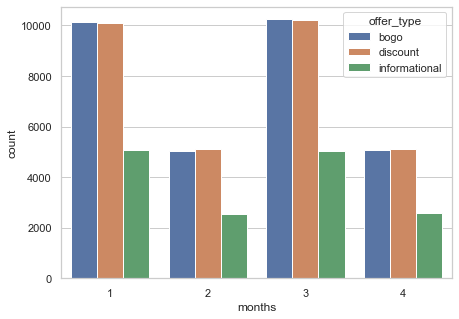

In [35]:
# The number of different offers which are issued in each month
plt.figure(figsize =[7,5])
ax = sns.countplot(data = offers_received, x = 'months', hue = 'offer_type')

In [36]:
# Total number of issued offers 
offers_received.offer_type.value_counts()

discount         30543
bogo             30499
informational    15235
Name: offer_type, dtype: int64

<AxesSubplot:xlabel='offer_type', ylabel='count'>

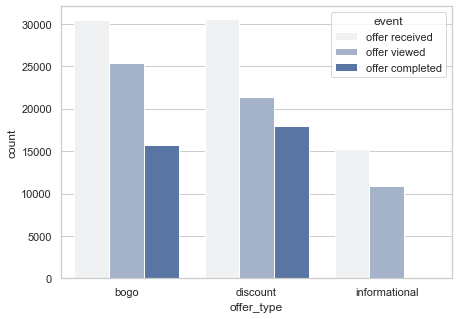

In [37]:
# The number of different events on each offer type. 
plt.figure(figsize =[7,5])
sns.countplot(data = offers_transaction_df, x = 'offer_type', hue = 'event', color = base_color)

> 1. The number of issued offers are unbalanced. 'BOGO' and 'Discount' types of offers are almost evenly distributed; around 30000. On the other hand, "Informational" type of offer is issued only the half of them (ca. 15000). 
> 2. Not all of the issued offers are viewed. Only 75,68% (= 57725/76277)of offers are checked by customers. 
> 3. Only half of issued 'BOGO' and 'discount' offers are completed. Note that the event whether the informational type of data is completed, is not collected.
> 4. From the last bar graph, we can recognize that customers viewed more 'BOGO' offers than 'Discount' offers. On the other hand, more 'Discount' type of offers are completed. 

### 3. 4. Customer Purchasing Patterns

> In this section, I explore customer purchasing patterns based on RFM analysis. [Reference - RFM analysis](https://en.wikipedia.org/wiki/RFM_(market_research))
RFM is an evaluation method to analyse customer value. It is often used in database marketing especially in retail and professional services industries. RFM indicates the following 3 dimensions:
> - Recency – How recently did the customer purchase?
> - Frequency – How often do they purchase?
> - Monetary Value – How much do they spend? 
<br><br>
> These features can be obtained from the provided transaction dataset.

In [38]:
# Recency 
recency = sales_transaction_df.groupby('customer_id', as_index= False)['days'].max()
recency['days'] = 120 - recency['days']
recency.rename(columns={'days':'recency'}, inplace = True)  

In [39]:
# Frequency 
transaction_cnt = sales_transaction_df.groupby(['customer_id','days'], as_index= False)['amount'].count()
frequency = transaction_cnt.groupby('customer_id')['days'].count().reset_index()
frequency.rename(columns={'days':'frequency'}, inplace = True)      

In [40]:
# Monetary Values 
monetary = sales_transaction_df.groupby('customer_id', as_index= False)['amount'].sum()
monetary.rename(columns={'amount':'monetary'}, inplace = True)      

In [41]:
# Merge the 3 elements 
rfm = recency.merge(frequency, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')
rfm_df = rfm.merge(monetary, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')

print('The size of the RFM dataframe: ' , rfm_df.shape)
rfm_df.head()

The size of the RFM dataframe:  (16578, 4)


,customer_id,recency,frequency,monetary
0,0009655768c64bdeb2e877511632db8f,3,8,127.60
1,00116118485d4dfda04fdbaba9a87b5c,40,3,4.09
2,0011e0d4e6b944f998e987f904e8c1e5,10,5,79.46
3,0020c2b971eb4e9188eac86d93036a77,1,8,196.86
4,0020ccbbb6d84e358d3414a3ff76cffd,7,12,154.05


In [42]:
# Descriptive Statistics of RFM dimensions
rfm_df.describe()

,recency,frequency,monetary
count,16578.00,16578.00,16578.00
mean,14.24,8.38,107.10
std,13.79,5.01,126.39
min,0.00,1.00,0.05
25%,4.00,5.00,23.68
50%,10.00,7.00,72.41
75%,20.00,11.00,150.94
max,117.00,36.00,1608.69


array([[<AxesSubplot:xlabel='recency', ylabel='recency'>,
        <AxesSubplot:xlabel='frequency', ylabel='recency'>,
        <AxesSubplot:xlabel='monetary', ylabel='recency'>],
       [<AxesSubplot:xlabel='recency', ylabel='frequency'>,
        <AxesSubplot:xlabel='frequency', ylabel='frequency'>,
        <AxesSubplot:xlabel='monetary', ylabel='frequency'>],
       [<AxesSubplot:xlabel='recency', ylabel='monetary'>,
        <AxesSubplot:xlabel='frequency', ylabel='monetary'>,
        <AxesSubplot:xlabel='monetary', ylabel='monetary'>]], dtype=object)

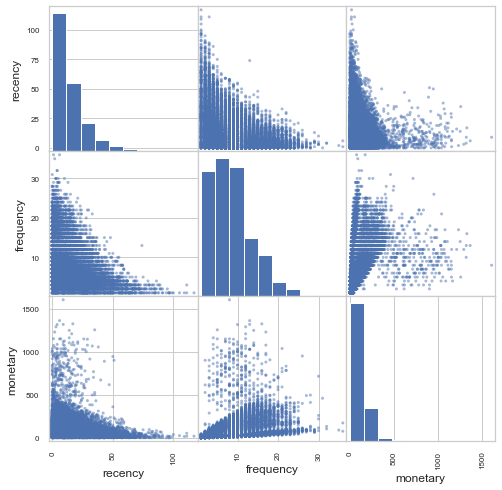

In [43]:
# Visualisation of customer purchasing patterns. 
pd.plotting.scatter_matrix(rfm_df, figsize = (8,8))

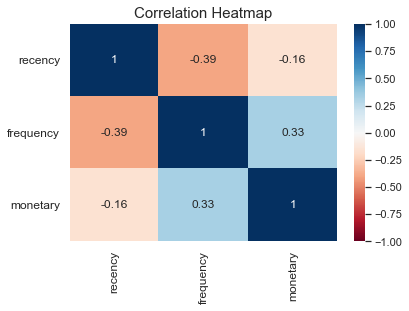

In [44]:
# Correlation in Heatmap form 
plt.figure(figsize=(6,4))
s = sns.heatmap(rfm_df.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize =12) 
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize =12) 
plt.title('Correlation Heatmap', fontsize =15)
plt.show()

> 1. I explore purchasing patterns of customers according to RFM Analysis. RFM analysis evaluates customer purchasing patterns with 3 elements: How recently does a customer purchase a product at Starbucks (Recency)? How often does the customer purchase a product during the period (Frequency)? How much does the customer spend at Starbucks (Monetary Value)? 
> 2. The latest purchase of customers is 14 days ago on average. Customers bought products 8 times at Starbucks on average. Also, the mean value of 'monetary' indicates that their average spendings during the test period is a little bit higher than 100 dollars. 
> 3. The scatter matrix shows interesting purchase patterns of customers. The histograms of recency, frequency and monetary values are all skewed to the right. Recency is negatively correlated with frequency and monetary values. On the other hand, frequency is positively related with monetary values. 
> 4. This indicates that the more recently customers purchase Starbucks products (lower recency value), the more frequently the customers buy our products, and the more they spend at Starbucks. Intuitively, the more frequently customers purchase, the more they spend at our store. 
> 5. The second heatmap indicates that the number of different offers that Starbucks sent to its customers are not highly related to their recency, frequency and monetary elements.  

------------------------


<a id='Analysis'></a>
## 4. Data Analysis

### 4. 1. Feature Engineering 

> During the test period, customers are received different offer(s). Some customers followed desirable processes to be rewarded. However, not all of them. Some other customers get rewarded without noticing that they received the offers. In this subsection, I define the "desirably-used" offers. Then I identify each offer and subsequent events were either 'desirable' or 'non-desirable'.  

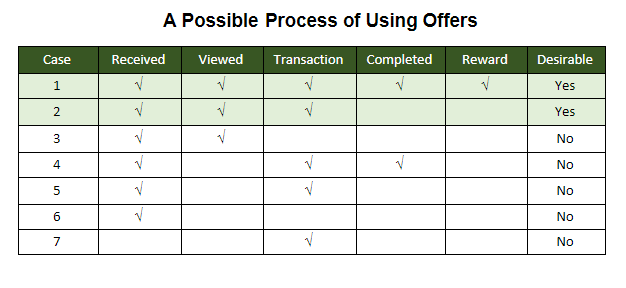

#### The Definition of "Desirably-used" Offers

I defined the meaning of "desirable" more broadly. 
- **Case 1**: If a person received an offer, viewed it, purchased a product, then met the level of difficulty (the minimum amount of spending to complete and get reward),and if all these processes occured during the offer duration, this person followed the "typical" desirable path of using offers. 
- **Case 2**: A person received an offer, viewed it, purchased a product. All these 3 processes occured during the offer duration. However, this person could not reach the difficulty of corresponding offers.  

In the provided dataset, some customers show different purchasing patterns. 

- **Case 3**: A person received an offer, viewed it during the offer duration. However after the person checked the offer, he/she did not purchase during the offer duration. 
- **Case 4**: A person received an offer. However the customer has not viewed it during the offer duration. Then he/she satisfy the difficulty of corresponding offers, so the customer got rewards. 
- **Case 5**: Similarly, a person received an offer. However the customer has not viewed it during the offer duration. Since this type of customer has not satisfied the minimum level of spendings, so they could not enjoy any rewards.
- **Case 6**: A customer who received an offer. However, the customer has not checked it and showed any transactions during the offer duration. 
- **Case 7**: These customers groups are actually ideal for our company. Although they didnt receive any offers, they purchased products at our stores.
<br><br>

Therefore, it is more efficient to analyse differrent demographic characters of the customer groups who used our offers properly (Case 1, Case 2), comparing to other customers (Case 3, Case 4, Case 5, Case 6, Case 7), to maximize the effect of offers in the future. 

#### Step 1: Restructuring the Transaction Dataframe

In [45]:
# To figure out which customers belong to which cases, I restructured the transaction dataframe.
transactions_event_df = pd.concat([transactions_df, pd.get_dummies(transactions_df.event)], axis = 1)
transactions_event_df.drop(['event','months'], axis = 1, inplace=True)

# To avoid any confusions, I selected necessary columns for the purpose of analysis in this section and rename the columns.
trans_event_mod_df = transactions_event_df[['customer_id', 'time','offer_id','days','offer received','offer viewed', 'transaction','offer completed','reward']]
trans_event_mod_df.rename(columns={'offer viewed': 'offer_viewed', 'offer received':'offer_received', 'offer completed':'offer_completed' },inplace = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


#### Step 2: Computing the valid offer Day

In [46]:
# Then I combined the dataframe with offer type and its duration from offer information dataset. 
trans_offer_info = trans_event_mod_df.merge(offer_info_df[['offer_id', 'offer_type','duration']], 
                                    left_on = 'offer_id', right_on = 'offer_id', how='left')

# For the calculation convenience, I fill up zeros into null values. 
trans_offer_info = trans_offer_info.fillna(0)

# I created a new column represening the last day of each offer. 
trans_offer_info['max_offer_day'] = trans_offer_info.offer_received*(trans_offer_info.duration + trans_offer_info.days)

In [47]:
# Then, I multiply the days column with event columns: 'offer_received', 'offer_viewed', 'transaction', 'offer_completed'
# These event columns now also explain which day does the event occur. 
event_cols = ['offer_received', 'offer_viewed', 'transaction', 'offer_completed']
trans_offer_info[event_cols]= trans_offer_info[event_cols].multiply(trans_offer_info.days, axis="index" )

trans_offer_info # Check the result

,customer_id,time,offer_id,days,offer_received,offer_viewed,transaction,offer_completed,reward,offer_type,duration,max_offer_day
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,0,0,0.00,bogo,7.00,8.00
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,0,0.00,discount,10.00,11.00
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,1,1,0,0,0,0.00,discount,7.00,8.00
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,1,1,0,0,0,0.00,discount,10.00,11.00
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,0,0,0,0.00,bogo,5.00,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,714,,120,0,0,120,0,0.00,0,0.00,0.00
306530,68213b08d99a4ae1b0dcb72aebd9aa35,714,,120,0,0,120,0,0.00,0,0.00,0.00
306531,a00058cf10334a308c68e7631c529907,714,,120,0,0,120,0,0.00,0,0.00,0.00
306532,76ddbd6576844afe811f1a3c0fbb5bec,714,,120,0,0,120,0,0.00,0,0.00,0.00


#### Step 3. Groupping the modified transaction dataframe by 'customer_id',  'days', and 'offer_id'

In [48]:
# Third, I groupped the transaction dataframe by Customer_id, days, and offer_id.
# The following dataframe (trans_per_pp_days_offer) represents transaction histories per customers, per days, per offers. 
trans_per_pp_days_offer = trans_offer_info.groupby(['customer_id',  'days', 'offer_id'], as_index= False)[['max_offer_day', 'offer_received', 'offer_viewed', 'transaction', 'offer_completed']].max()

In [49]:
# 4. I modified the aboved dataframe: trans_per_pp_days_offer for convenient calculation as follows 
# 4-1. Replace the 0s in 'max_offer_day' column with np. NaNs. 
trans_per_pp_days_offer_v1  = trans_per_pp_days_offer.replace( {'max_offer_day': 0.00, 'offer_id':''}, np.NaN)
# 4-2. Fill the NaNs using the method = 'ffill': to propagate last valid observation forward to next valid backfill 
trans_per_pp_days_offer_v1.fillna(method='ffill',inplace= True)
# 4-3. Finally I properly edit the max_offer_day column. 
print(trans_per_pp_days_offer_v1.shape)
trans_per_pp_days_offer_v1.head(10)


(289408, 8)


,customer_id,days,offer_id,max_offer_day,offer_received,offer_viewed,transaction,offer_completed
0,0009655768c64bdeb2e877511632db8f,29,5a8bc65990b245e5a138643cd4eb9837,32.00,29,0,0,0
1,0009655768c64bdeb2e877511632db8f,33,5a8bc65990b245e5a138643cd4eb9837,32.00,0,33,0,0
2,0009655768c64bdeb2e877511632db8f,39,5a8bc65990b245e5a138643cd4eb9837,32.00,0,0,39,0
3,0009655768c64bdeb2e877511632db8f,57,3f207df678b143eea3cee63160fa8bed,61.00,57,0,0,0
4,0009655768c64bdeb2e877511632db8f,63,3f207df678b143eea3cee63160fa8bed,61.00,0,63,0,0
5,0009655768c64bdeb2e877511632db8f,69,f19421c1d4aa40978ebb69ca19b0e20d,74.00,69,0,0,0
6,0009655768c64bdeb2e877511632db8f,70,f19421c1d4aa40978ebb69ca19b0e20d,74.00,0,0,70,0
7,0009655768c64bdeb2e877511632db8f,70,f19421c1d4aa40978ebb69ca19b0e20d,74.00,0,0,0,70
8,0009655768c64bdeb2e877511632db8f,77,f19421c1d4aa40978ebb69ca19b0e20d,74.00,0,77,0,0
9,0009655768c64bdeb2e877511632db8f,85,fafdcd668e3743c1bb461111dcafc2a4,95.00,85,0,0,0


In [50]:
trans_per_event = trans_per_pp_days_offer_v1.copy()

#### Step 4. Filtering if events occurred prior to max_offer_day

In [51]:
# To receive an offer always occur before max_offer_day 
trans_per_event = trans_per_event.query('offer_received ==0 ')
trans_per_event['event_sum'] = trans_per_event[event_cols].sum(axis=1)

In [52]:
# I create a "desirable" column: meaning that it is a desirable event, when the event occur before the max_offer_day
trans_per_event['desirable'] = trans_per_event['max_offer_day'] - trans_per_event.event_sum

# A desirable event must have positive value. 
desirable_event = trans_per_event.query('desirable >=0 ')

In [53]:
# I groupped all transactions by customers, offer_id, and max_offer_days
desirable_event_per_offer = desirable_event.groupby(['customer_id','offer_id','max_offer_day'], as_index = False).max()

# One more condition to be desirable is that a customer should view the offer and purchase the product after received the offer. 
desirable_event_per_offer_mod = desirable_event_per_offer.query('offer_viewed > 0 & transaction > 0')

# Finally, I combined the dataframe with each offer name from offer information dataframe. 
event_name_df = desirable_event_per_offer_mod.merge(offer_info_df[['offer_id', 'offer_type']],
                                                    left_on = 'offer_id', right_on = 'offer_id', how='left')

# This dataframe shows the desirably-used offers only.
event_name_df 

,customer_id,offer_id,max_offer_day,days,offer_received,offer_viewed,transaction,offer_completed,event_sum,desirable,offer_type
0,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,95.00,93,0,91,93,89,93,6.00,discount
1,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,11.00,10,0,3,10,10,10,8.00,discount
2,003d66b6608740288d6cc97a6903f4f0,fafdcd668e3743c1bb461111dcafc2a4,79.00,79,0,71,79,0,79,8.00,discount
3,00426fe3ffde4c6b9cb9ad6d077a13ea,fafdcd668e3743c1bb461111dcafc2a4,39.00,37,0,32,37,0,37,7.00,discount
4,004b041fbfe44859945daa2c7f79ee64,f19421c1d4aa40978ebb69ca19b0e20d,90.00,90,0,86,90,90,90,4.00,bogo
...,...,...,...,...,...,...,...,...,...,...,...
13020,fff7576017104bcc8677a8d63322b5e1,fafdcd668e3743c1bb461111dcafc2a4,95.00,94,0,88,94,0,94,7.00,discount
13021,fff8957ea8b240a6b5e634b6ee8eafcf,fafdcd668e3743c1bb461111dcafc2a4,79.00,76,0,73,76,0,76,6.00,discount
13022,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,39.00,35,0,30,35,34,35,9.00,discount
13023,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,104.00,102,0,98,102,0,102,6.00,discount


In [54]:
# The number of desirably-used offer types
event_name_df.offer_type.value_counts() 

discount         6468
bogo             5370
informational    1187
Name: offer_type, dtype: int64

In [55]:
# The unique number of customers who used offers in a desirable way
event_name_df.customer_id.nunique()

9042

#### Step 5. Comparison
The dataframe (event_name_df) is incomplete, since it shows only  desirably-used offers. Now I create a dataframe with all provided offers and then classify whether individual offers are used in a desirable way. 

In [56]:
# From a previous dataframe, I filtered the data points with 'offer_received' event
offers_received_mod = trans_per_pp_days_offer_v1.query('offer_received > 0')[['customer_id','days','offer_id','max_offer_day']]

# Then I combined
total_offers = offers_received_mod.merge(offers_received[['customer_id','days','offer_id','offer_type']], 
                                        left_on = ['customer_id','days','offer_id'],
                                        right_on = ['customer_id','days','offer_id'],
                                        how='left')

total_offers

,customer_id,days,offer_id,max_offer_day,offer_type
0,0009655768c64bdeb2e877511632db8f,29,5a8bc65990b245e5a138643cd4eb9837,32.00,informational
1,0009655768c64bdeb2e877511632db8f,57,3f207df678b143eea3cee63160fa8bed,61.00,informational
2,0009655768c64bdeb2e877511632db8f,69,f19421c1d4aa40978ebb69ca19b0e20d,74.00,bogo
3,0009655768c64bdeb2e877511632db8f,85,fafdcd668e3743c1bb461111dcafc2a4,95.00,discount
4,0009655768c64bdeb2e877511632db8f,97,2906b810c7d4411798c6938adc9daaa5,104.00,discount
...,...,...,...,...,...
76272,ffff82501cea40309d5fdd7edcca4a07,29,0b1e1539f2cc45b7b9fa7c272da2e1d7,39.00,discount
76273,ffff82501cea40309d5fdd7edcca4a07,57,2906b810c7d4411798c6938adc9daaa5,64.00,discount
76274,ffff82501cea40309d5fdd7edcca4a07,69,2906b810c7d4411798c6938adc9daaa5,76.00,discount
76275,ffff82501cea40309d5fdd7edcca4a07,85,9b98b8c7a33c4b65b9aebfe6a799e6d9,92.00,bogo


In [57]:
total_issued_bogo = total_offers.query('offer_type =="bogo"')
total_issued_disc = total_offers.query('offer_type =="discount"')
total_issued_info = total_offers.query('offer_type =="informational"')

In [58]:
total_issued_bogo.shape, total_issued_disc.shape, total_issued_info.shape

((30499, 5), (30543, 5), (15235, 5))

In [59]:
def Classification_of_offers(total_offers, desirable_offer_df): 
    
    desirable_offer_df['desirable_use'] = 'desirable'
    total_offers_final = total_offers.merge(desirable_offer_df[['customer_id','offer_id','max_offer_day','desirable_use']],
                      left_on = ['customer_id','max_offer_day','offer_id'],
                      right_on =['customer_id','max_offer_day','offer_id'],
                      how = 'left')
    total_offers_final= total_offers_final.fillna('non-desirable')
    
    return total_offers_final

In [60]:
Classification_of_offers(total_offers, event_name_df)

,customer_id,days,offer_id,max_offer_day,offer_type,desirable_use
0,0009655768c64bdeb2e877511632db8f,29,5a8bc65990b245e5a138643cd4eb9837,32.00,informational,non-desirable
1,0009655768c64bdeb2e877511632db8f,57,3f207df678b143eea3cee63160fa8bed,61.00,informational,non-desirable
2,0009655768c64bdeb2e877511632db8f,69,f19421c1d4aa40978ebb69ca19b0e20d,74.00,bogo,non-desirable
3,0009655768c64bdeb2e877511632db8f,85,fafdcd668e3743c1bb461111dcafc2a4,95.00,discount,desirable
4,0009655768c64bdeb2e877511632db8f,97,2906b810c7d4411798c6938adc9daaa5,104.00,discount,non-desirable
...,...,...,...,...,...,...
76272,ffff82501cea40309d5fdd7edcca4a07,29,0b1e1539f2cc45b7b9fa7c272da2e1d7,39.00,discount,desirable
76273,ffff82501cea40309d5fdd7edcca4a07,57,2906b810c7d4411798c6938adc9daaa5,64.00,discount,non-desirable
76274,ffff82501cea40309d5fdd7edcca4a07,69,2906b810c7d4411798c6938adc9daaa5,76.00,discount,non-desirable
76275,ffff82501cea40309d5fdd7edcca4a07,85,9b98b8c7a33c4b65b9aebfe6a799e6d9,92.00,bogo,non-desirable


In [61]:
total_issued_bogo = Classification_of_offers(total_offers, event_name_df).query('offer_type =="bogo"')
total_issued_disc = Classification_of_offers(total_offers, event_name_df).query('offer_type =="discount"')
total_issued_info = Classification_of_offers(total_offers, event_name_df).query('offer_type =="informational"')

In [62]:
print('BOGO Offer:' )
print(total_issued_bogo.desirable_use.value_counts())
print(' ')
print('Discount Offer:' )
print(total_issued_disc.desirable_use.value_counts())
print(' ')
print('Informational Offer:' )
print(total_issued_info.desirable_use.value_counts())

BOGO Offer:
non-desirable    25129
desirable         5370
Name: desirable_use, dtype: int64
 
Discount Offer:
non-desirable    24075
desirable         6468
Name: desirable_use, dtype: int64
 
Informational Offer:
non-desirable    14048
desirable         1187
Name: desirable_use, dtype: int64


### Data Exportation 

In [63]:
# Export the datasets for the second part of analysis
Classification_of_offers(total_offers, event_name_df).to_csv('total_issued_offer.csv', index=False)
rfm_df.to_csv('rfm_score.csv', index=False)
customer_info_df.to_csv('customer_df.csv', index=False)

# Data Preparation from above

In [64]:
# Read in the csv files
offer_df = pd.read_csv('total_issued_offer.csv')
customer_df = pd.read_csv('customer_df.csv')
rfm_df = pd.read_csv('rfm_score.csv')

In [65]:
# Merge all the datasets
customer_offer_df_mod = offer_df.merge(customer_df, left_on = 'customer_id', right_on ='customer_id', how='left')
customer_offer_df =customer_offer_df_mod.merge(rfm_df, left_on = 'customer_id', right_on ='customer_id', how='left').fillna(0)

In [66]:
customer_offer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76277 entries, 0 to 76276
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       76277 non-null  object 
 1   days              76277 non-null  int64  
 2   offer_id          76277 non-null  object 
 3   max_offer_day     76277 non-null  float64
 4   offer_type        76277 non-null  object 
 5   desirable_use     76277 non-null  object 
 6   gender            76277 non-null  object 
 7   age               76277 non-null  int64  
 8   became_member_on  76277 non-null  object 
 9   income            76277 non-null  float64
 10  days_as_member    76277 non-null  int64  
 11  recency           76277 non-null  float64
 12  frequency         76277 non-null  float64
 13  monetary          76277 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 8.7+ MB


In [67]:
# Drop the unnecessary features 
customer_offer_df.drop(['became_member_on','days','max_offer_day','offer_id'],axis =1, inplace= True)

In [68]:
total_issued_bogo = customer_offer_df.query('offer_type =="bogo"')
total_issued_disc = customer_offer_df.query('offer_type =="discount"')
total_issued_info = customer_offer_df.query('offer_type =="informational"')

# Characteristics of the Dataset


# 1. Imbalanced Data 

In [69]:
print('BOGO Offer:' )
print(total_issued_bogo.desirable_use.value_counts())
print(' ')
print('Discount Offer:' )
print(total_issued_disc.desirable_use.value_counts())
print(' ')
print('Informational Offer:' )
print(total_issued_info.desirable_use.value_counts())

BOGO Offer:
non-desirable    25129
desirable         5370
Name: desirable_use, dtype: int64
 
Discount Offer:
non-desirable    24075
desirable         6468
Name: desirable_use, dtype: int64
 
Informational Offer:
non-desirable    14048
desirable         1187
Name: desirable_use, dtype: int64


<AxesSubplot:xlabel='offer_type', ylabel='count'>

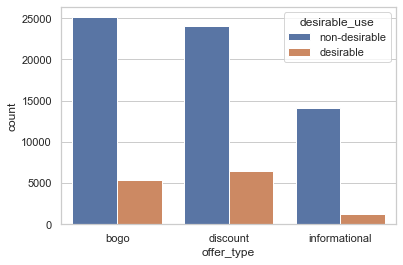

In [70]:
offer_order =['bogo', 'discount','informational']
sns.countplot(data= customer_offer_df, x= 'offer_type', hue = 'desirable_use', order = offer_order)

> The size of 'informational' offer class is very low. It consist of 9,86% of all datapoints only. 
[Reference - Imbalanced Data](https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/)

# 2. Classification Feature Selection

Running the example first creates the regression dataset, then defines the feature selection and applies the feature selection procedure to the dataset, returning a subset of the selected input features. Reference - Feature Selection

In [71]:
# Import necessary libraries 
from sklearn.feature_selection import f_classif

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [72]:
def Feature_selection(offer_df):
    
    # Target variable: 'desirable_use'
    categorical_target = offer_df.desirable_use
    
    selected_inputs = []
    
    # Numerical Inputs Selection 
    numerical_inputs = offer_df.drop(['customer_id','desirable_use','gender','offer_type'], axis =1)
    
    anova_test = f_classif(numerical_inputs, categorical_target)
    
    prob = 0.95
    alpha = 1.0 - prob
    
    for i in range(len(anova_test[1])):
        if anova_test[1][i] < alpha:
            selected_inputs.append(numerical_inputs.columns[i])
    
    # Categorical Inputs Selection 
    categorical_input = offer_df['gender']
    gender_df = pd.get_dummies(offer_df.gender, prefix = 'gender', prefix_sep = '_')
    gender_df['desirable_use'], gender_df['customer_id'] = offer_df['desirable_use'], offer_df['customer_id']
    
    contingency_table = gender_df.groupby(['desirable_use'], as_index = True).sum()
    stat, p, dof, expected = chi2_contingency(contingency_table.values)
       
    if p <= alpha:
        selected_inputs.append('gender')

        
    return offer_df[selected_inputs]


In [73]:
bogo_df = Feature_selection(total_issued_bogo)
discount_df = Feature_selection(total_issued_disc)
informational_df = Feature_selection(total_issued_info)

# 4. Data Analysis
 
 4.2. Data Spliting
 
 4.3. Data Balancing
 
 4.4. Model Comparison
 
 4.5. Model Evaluation
 
 4.6. Model Selection

# 4. 2. Data Spliting

In [74]:
from sklearn.model_selection import train_test_split


test_size = 0.2
random_state = 42

bogo_target= total_issued_bogo.desirable_use
disc_target= total_issued_disc.desirable_use
info_target= total_issued_info.desirable_use

# Train & Test Data

In [75]:
# Bogo
bogo_trainX, bogo_testX, bogo_trainy, bogo_testy = train_test_split(bogo_df, bogo_target, 
                                                                  test_size=test_size, random_state=random_state)
# Discount
disc_trainX, disc_testX, disc_trainy, disc_testy = train_test_split(discount_df, disc_target, 
                                                                    test_size=test_size, random_state=random_state)
# Informational
info_trainX, info_testX, info_trainy, info_testy = train_test_split(informational_df, info_target, 
                                                                    test_size=test_size, random_state=random_state)

# 4. 3. Data Balancing

In [76]:
# check version number
import imblearn
print(imblearn.__version__)

# Import necessary libraries 
from imblearn.over_sampling import SMOTE
from collections import Counter

0.7.0


In [77]:
import collections
print('         BOGO Training Data: ',collections.Counter(bogo_trainy) )
print('     Discount Training Data: ',collections.Counter(disc_trainy) )
print('Informational Training Data: ',collections.Counter(info_trainy) )

         BOGO Training Data:  Counter({'non-desirable': 20108, 'desirable': 4291})
     Discount Training Data:  Counter({'non-desirable': 19243, 'desirable': 5191})
Informational Training Data:  Counter({'non-desirable': 11244, 'desirable': 944})


In [78]:
def Balancing_Data(X_train, y_train): 
    
    # Decide how many the minority class should be oversampled 
    
    nondes_train = int(collections.Counter(y_train)['non-desirable'])
    # des_train = int(collections.Counter(y_train)['desirable']*4)
    des_train = int(nondes_train*0.7)
    
    # Transform the dataset
    strategy = { 'non-desirable':nondes_train, 'desirable':des_train}
    oversample = SMOTE(sampling_strategy=strategy)
    
    # Balanced dataset 
    X_balanced, y_balanced = oversample.fit_resample( X_train, y_train)
    
    # Summarize newly balanced Distribution
    counter = Counter(y_balanced)
    for k,v in counter.items():
        per = v / len(y_balanced) * 100
        print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
        
    # Plot the distribution
    plt.bar(counter.keys(), counter.values())
    plt.show()
    
    balanced_train = pd.concat([X_balanced, y_balanced],axis=1)
    
    return balanced_train
    

Class=non-desirable, n=20108 (58.825%)
Class=desirable, n=14075 (41.175%)


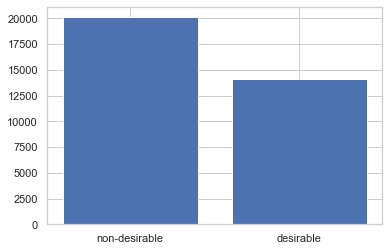

Class=non-desirable, n=19243 (58.824%)
Class=desirable, n=13470 (41.176%)


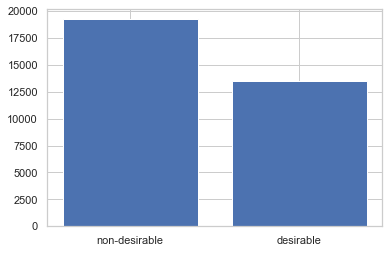

Class=desirable, n=7870 (41.174%)
Class=non-desirable, n=11244 (58.826%)


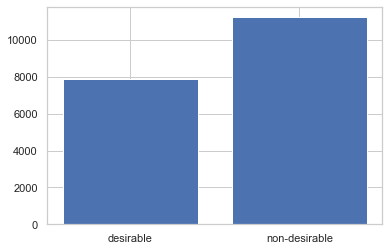

In [79]:
balanced_bogo = Balancing_Data(bogo_trainX, bogo_trainy)
balanced_disc = Balancing_Data(disc_trainX, disc_trainy)
balanced_info = Balancing_Data(info_trainX, info_trainy)

# 4. 4. Model Comparison

Sklearn Ensemble Methods (Random Forest, AdaBoost, GradientBoost)

XGBoost vs. LightGBM vs. CatBoost

LogisticRegression

In [80]:
# Import necessary libraries 
# 1. Sklearn Ensemble Methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier) 

# 2. XG Boost vs. Light GBM vs. CatBoost
import xgboost as xgb # XG Boost 
import lightgbm as lgbm # Light GBM
import catboost as cb # CatBoost

# 3. A Benchmark Model
from sklearn.linear_model import LogisticRegression 

# Evaluation tools 
from sklearn import metrics
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 

from time import time # To measure execution time of the model 

# Set up the models 

In [81]:
# 1. Sklearn Ensemble Methods
rf = RandomForestClassifier(n_estimators=500, max_features=0.06, n_jobs=6, class_weight = 'balanced', 
                            verbose = 0, random_state=42)

base_estim = DecisionTreeClassifier(max_depth=1, max_features=0.06)                            
ab = AdaBoostClassifier(base_estimator=base_estim, n_estimators=500, learning_rate=0.5, random_state=42)

gbm = GradientBoostingClassifier(n_estimators=2000, subsample=0.75, max_features=0.06, verbose = 0,  validation_fraction=0.1, random_state=42)

In [82]:
# 2. XG Boost vs. Light GBM vs. CatBoost
xgb = xgb.XGBClassifier(n_estimators=2000, tree_method='hist', subsample=0.75, 
                        objective = 'binary:logistic', n_jobs=6, random_state=42)

lgbm = lgbm.LGBMClassifier(n_estimators=2000, n_jobs=6, random_state=42)
                          

cb =  cb.CatBoostClassifier(n_estimators=2000, colsample_bylevel=0.06, max_leaves=31, subsample=0.75, 
                            thread_count=6, verbose = 0, random_state=42)

In [83]:
# 3. A Benchmark Model
logreg = LogisticRegression(random_state=42, class_weight = 'balanced')

In [84]:
models = [logreg, rf, ab, gbm, xgb, lgbm, cb]
model_names = [i.__class__.__name__ for i in models]
es_models = ['XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']

# Train and Evaluate the models 

In [85]:
def Train_Evaluate_Models(balanced_df, test_inputs, test_target):
    
    # Identify target and inputs variables
    balanced_target= balanced_df.desirable_use
    balanced_inputs= balanced_df.drop(['desirable_use'], axis=1)
    
    # Create a validation sample from balanced training data 
    trainX_sub, trainX_valid, trainy_sub, trainy_valid = train_test_split(balanced_inputs, balanced_target, test_size=0.1)
    
    # Set up a dataframe to contain the results
    results = pd.DataFrame(columns=['accuracy','prediction','recall','f1_score', 'run_time'])  
    
    # Training the models 
    for m, n in zip(models, model_names):
    
        start_time = time()
        if n in es_models:
            m.fit(trainX_sub, trainy_sub,
                  eval_set = [(trainX_valid, trainy_valid)], 
                  early_stopping_rounds=15, verbose=0)
        else:
            m.fit(balanced_inputs, balanced_target)
    
        run_time = time() - start_time

        y_pred = m.predict(test_inputs)
        accuracy = np.mean( y_pred == test_target)
        precision = precision_score(test_target, y_pred, average= 'weighted', zero_division=0)
        recall = recall_score(test_target, y_pred, average= 'weighted', zero_division=0)
        f1_score = 2 * (precision * recall) / (precision + recall)

        results.loc[n] = [accuracy,precision, recall, f1_score, run_time]

        del m
    
    return results
    

In [86]:
Train_Evaluate_Models(balanced_bogo, bogo_testX, bogo_testy)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:25:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy,prediction,recall,f1_score,run_time
LogisticRegression,0.65,0.78,0.65,0.71,0.37
RandomForestClassifier,0.72,0.73,0.72,0.73,9.08
AdaBoostClassifier,0.72,0.77,0.72,0.74,37.37
GradientBoostingClassifier,0.80,0.73,0.80,0.77,33.06
XGBClassifier,0.79,0.73,0.79,0.76,0.84
LGBMClassifier,0.81,0.74,0.81,0.77,1.05
CatBoostClassifier,0.73,0.77,0.73,0.75,1.41


In [87]:
Train_Evaluate_Models(balanced_disc, disc_testX, disc_testy)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:28:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy,prediction,recall,f1_score,run_time
LogisticRegression,0.62,0.72,0.62,0.67,0.20
RandomForestClassifier,0.69,0.70,0.69,0.69,10.53
AdaBoostClassifier,0.70,0.73,0.70,0.72,35.24
GradientBoostingClassifier,0.77,0.71,0.77,0.74,29.09
XGBClassifier,0.76,0.69,0.76,0.72,1.01
LGBMClassifier,0.78,0.71,0.78,0.74,0.77
CatBoostClassifier,0.79,0.63,0.79,0.70,0.23


In [88]:
Train_Evaluate_Models(balanced_info, info_testX, info_testy)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:29:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy,prediction,recall,f1_score,run_time
LogisticRegression,0.64,0.88,0.64,0.74,0.28
RandomForestClassifier,0.86,0.86,0.86,0.86,5.24
AdaBoostClassifier,0.78,0.87,0.78,0.82,19.62
GradientBoostingClassifier,0.90,0.86,0.90,0.88,17.49
XGBClassifier,0.90,0.86,0.90,0.88,0.81
LGBMClassifier,0.91,0.86,0.91,0.88,1.03
CatBoostClassifier,0.74,0.87,0.74,0.80,1.78


# 4. 5. Model Selection 
> **LGBMClassifier** <br>
> For all type of offers,  "LGBMClassifier" shows one of the outstanding model performances. Also the model performed well within a short period of time. In this section, I additionally compare several input features that show significant difference between 'desirably' predicted samples and 'non-desirably' predicted samples. 

In [89]:
bogo_all_results = pd.DataFrame(lgbm.predict(bogo_testX), columns=['predicted_target'])
bogo_predicted = pd.concat([bogo_testX.reset_index(), bogo_all_results], axis=1)

In [90]:
disc_all_results = pd.DataFrame(lgbm.predict(disc_testX), columns=['predicted_target'])
disc_predicted = pd.concat([disc_testX.reset_index(), disc_all_results], axis=1)

In [91]:
info_all_results = pd.DataFrame(lgbm.predict(info_testX), columns=['predicted_target'])
info_predicted = pd.concat([info_testX.reset_index(), info_all_results], axis=1)

Text(0.5, 1.0, 'Monetary Value (BOGO)')

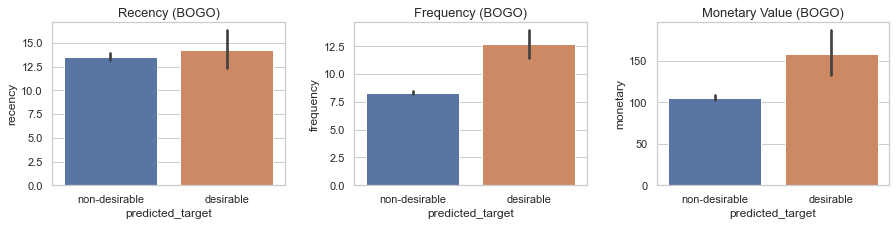

In [92]:
plt.figure(figsize=[15,3]) 
plt.subplots_adjust(wspace = 0.3 , hspace= 0.1)

plt.subplot(1, 3, 1)
sns.barplot(data = bogo_predicted, x = 'predicted_target', y = 'recency')
plt.title('Recency (BOGO)', fontsize = 13)

plt.subplot(1, 3, 2)
sns.barplot(data = bogo_predicted, x = 'predicted_target', y = 'frequency')
plt.title('Frequency (BOGO)', fontsize = 13)

plt.subplot(1, 3, 3)
sns.barplot(data = bogo_predicted, x = 'predicted_target', y = 'monetary')
plt.title('Monetary Value (BOGO)', fontsize = 13)

Text(0.5, 1.0, 'Monetary (Discount)')

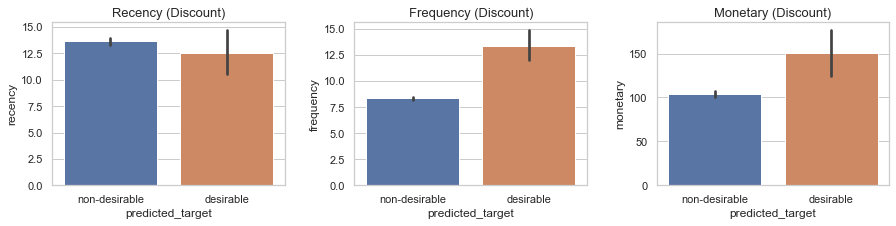

In [93]:
plt.figure(figsize=[15,3]) 
plt.subplots_adjust(wspace = 0.3 , hspace= 0.5)

plt.subplot(1, 3, 1)
sns.barplot(data = disc_predicted, x = 'predicted_target', y = 'recency')
plt.title('Recency (Discount)', fontsize = 13)

plt.subplot(1, 3, 2)
sns.barplot(data = disc_predicted, x = 'predicted_target', y = 'frequency')
plt.title('Frequency (Discount)', fontsize = 13)

plt.subplot(1, 3, 3)
sns.barplot(data = disc_predicted, x = 'predicted_target', y = 'monetary')
plt.title('Monetary (Discount)', fontsize = 13)

Text(0.5, 1.0, 'Monetary (Informational)')

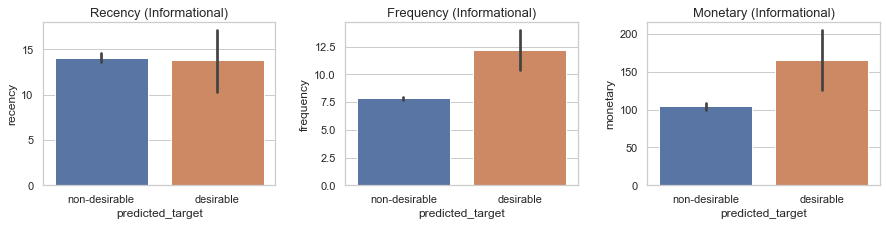

In [94]:
plt.figure(figsize=[15,3]) 
plt.subplots_adjust(wspace = 0.3 , hspace= 0.5)

plt.subplot(1, 3, 1)
sns.barplot(data = info_predicted, x = 'predicted_target', y = 'recency')
plt.title('Recency (Informational)', fontsize = 13)

plt.subplot(1, 3, 2)
sns.barplot(data = info_predicted, x = 'predicted_target', y = 'frequency')
plt.title('Frequency (Informational)', fontsize = 13)

plt.subplot(1, 3, 3)
sns.barplot(data = info_predicted, x = 'predicted_target', y = 'monetary')
plt.title('Monetary (Informational)', fontsize = 13)

# 5. Conclusion

 > In this analysis, I analysed how Starbucks customers use offers based on the transaction data. The customer profile dataset contains a few missing data. These missing values are imputed by the median value of each features. Imputation with its own median values has several advantages. Since the median value is one of the existing values, it is realistic. Also it makes the distribution less skewed. 
By adjusting the existing features in transcript dataframe, I convert the time column into day, and month columns. <br><br>
> Using the cleaned data, I explored current business situations. The number of traffics varies in each month. It increased until the third month. The change of sales amounts follows almost identical patterns with the change of traffics. We can understand that more traffics bring better sales performances. Interestingly, although the number of traffics and sales amount are different in each month, the average spending per each transaction is remarkably similar across the months. <br><br>
> All customers in the profile dataset purchased products at Starbucks, although not all of them received offers. The average age of customers are 54.5 years old, and their average yearly income is around 65227. There is no significant difference between genders regarding the received type of offers. Finally, the total number of offers and the number of each type of offers are not correlated with customer's ages, incomes, the number of days as a Starbucks member. <br><br>
> The number of issued offers is unbalanced. 'BOGO' and 'Discount' types of offers are almost evenly distributed; around 30000. On the other hand, "Informational" type of offer is issued only the half of them (ca. 15000). Not all of the issued offers are viewed. Only 75,68% (= 57725/76277) of offers are checked by customers. Only half of issued 'BOGO' and 'discount' offers are completed. <br><br>
>  In addition, I explored customer purchasing patterns based on RFM analysis. RFM is an evaluation method to analyse customer value. It is often used in database marketing especially in retail and professional services industries. RFM indicates the following 3 dimensions: Recency, Frequency, Monetary Value. <br><br>
> As mentioned in Capstone proposal, I defined the desirably used offers by both Case 1 and Case 2. Based on the definition, I identified all offer usages into 2 groups: 'desirable', 'non-desirable' per each offer type. As you can see the first bar chart in the part 2, all three datasets highly imbalanced. Therefore, I alleviated the unbalanced datasets by applying Synthetic Minority Oversampling Technique (SMOTE). Then I trained each dataset with various classification models.  <br><br>
>For all type of offers, "LGBMClassifier" showed the optimal model performances. It achieved 0.7742, 0.7388, 0.8830 of f1-score for bogo, discount, informational datasets, respectively, within the shorter period of time. The f1-score is considerably larger than that of the benchmark model. Also the time duration is much shorter than that of the benchmark model. The model with LGBMClassifier is more efficient than the benchmark model. 